In [7]:
import sklearn

KeyboardInterrupt: 

In [6]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/79/3d/02d5d3ed359498fec3abdf65407d3c07e3b8765af17464969055aaec5171/scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/d4/a1/d4adf25b6d2bef8d0ad1682829dcfcba97f3f96bb5b6f137bc3e41003cc7/scipy-1.13.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     -------------------------------------- 60.6/60.6 kB 811.9 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from http


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
polish_companies_bankruptcy = fetch_ucirepo(id=365) 
  
# data (as pandas dataframes) 
X = polish_companies_bankruptcy.data.features 
y = polish_companies_bankruptcy.data.targets 
  
# metadata 
print(polish_companies_bankruptcy.metadata) 
  
# variable information 
print(polish_companies_bankruptcy.variables) 


{'uci_id': 365, 'name': 'Polish Companies Bankruptcy', 'repository_url': 'https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data', 'data_url': 'https://archive.ics.uci.edu/static/public/365/data.csv', 'abstract': 'The dataset is about bankruptcy prediction of Polish companies.The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 10503, 'num_features': 65, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2016, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C5F600', 'creators': ['Sebastian Tomczak'], 'intro_paper': {'title': 'Ensemble boosted trees with synthetic features generation in application to bankruptcy prediction', 'authors': 'Maciej Ziȩba,

In [9]:

X = polish_companies_bankruptcy.data.features 
y = polish_companies_bankruptcy.data.targets 

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [63]:
%pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [ ]:
from sklearn 

In [13]:
print(X.head())

   year        A1       A2       A3      A4       A5       A6        A7  \
0     1  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760   
1     1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340   
2     1  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060   
3     1  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704   
4     1  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320   

        A8      A9  ...       A55       A56      A57      A58       A59  \
0  1.33050  1.1389  ...  348690.0  0.121960  0.39718  0.87804  0.001924   
1  0.99601  1.6996  ...    2304.6  0.121300  0.42002  0.85300  0.000000   
2  0.43695  1.3090  ...    6332.7  0.241140  0.81774  0.76599  0.694840   
3  1.86610  1.0571  ...   20545.0  0.054015  0.14207  0.94598  0.000000   
4  0.63070  1.1559  ...    3186.6  0.134850  0.48431  0.86515  0.124440   

      A60     A61      A62     A63      A64  
0  8.4160  5.1372   82.658  4.4158   7.4277  
1  4.1

In [23]:
X.shape

(43405, 65)

In [9]:
print(y.head())

   class
0      0
1      0
2      0
3      0
4      0


Challenge: we don't know if the companies or firms which are given in each year are same or not, there is no unique identifier. 
Because of this scenario we only take a particular year and try to get some insights from it

In [11]:
# Let's take 3rd year as in the ML challenge they've asked us to analyze 10503 examples
X=X[X['year']==3].reset_index()
X=X.drop(columns=['index'])

In [12]:
y=y.iloc[17200:27703]

In [13]:
y=y.reset_index()
y=y.drop(columns=['index'])

In [35]:
X

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,3,0.174190,0.41299,0.143710,1.34800,-28.9820,0.603830,0.219460,1.122500,1.19610,...,127000.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341
1,3,0.146240,0.46038,0.282300,1.62940,2.5952,0.000000,0.171850,1.172100,1.60180,...,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500
2,3,0.000595,0.22612,0.488390,3.15990,84.8740,0.191140,0.004572,2.988100,1.00770,...,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581
3,3,0.024526,0.43236,0.275460,1.78330,-10.1050,0.569440,0.024526,1.305700,1.05090,...,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844
4,3,0.188290,0.41504,0.342310,1.92790,-58.2740,0.000000,0.233580,1.409400,1.33930,...,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,3,0.002861,0.58067,-0.223860,0.51658,-31.8660,0.002861,0.002861,0.618550,1.01200,...,-4321.5,0.011834,0.007966,0.98817,0.327360,38.1420,39.1500,42.202,8.6489,5.2646
10499,3,-0.051968,0.55254,0.147150,2.16980,12.7480,-0.051968,-0.034361,0.669830,0.94694,...,13488.0,-0.056037,-0.140410,1.05600,1.153000,14.4930,9.2851,32.761,11.1410,1.9276
10500,3,-0.135900,0.83954,-0.342010,0.46526,-145.3100,-0.219120,-0.131860,0.191130,1.09990,...,-4233.0,0.144120,-0.846930,0.85427,0.814200,6.2737,9.6966,212.230,1.7198,1.5659
10501,3,0.009423,0.50028,0.261630,1.52300,-10.1580,0.009423,0.007700,0.989900,1.01230,...,2686.9,0.012186,0.019027,0.98781,0.000000,5.9675,4.3536,98.240,3.7154,7.8068


In [38]:
X.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,3,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,...,127000.0,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341
1,3,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,...,3387.8,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500
2,3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,...,20453.0,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581
3,3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,...,5012.6,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844
4,3,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,...,13730.0,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375


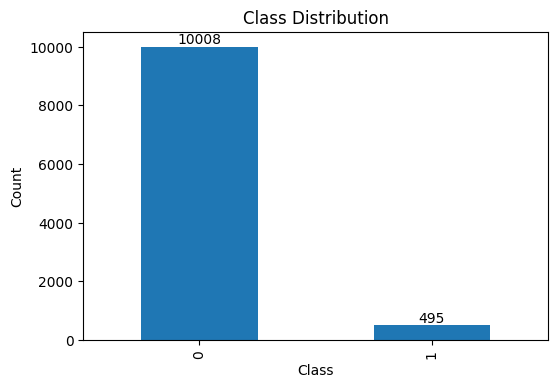

In [14]:
plt.figure(figsize=(6, 4))
counts = y['class'].value_counts()
counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

In [15]:
data=pd.concat([X,y],axis=1)

In [16]:
data.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,class
0,3,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,3,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0
2,3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
3,3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0
4,3,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0


In [17]:
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
year       0
A1         0
A2         0
A3         0
A4        18
        ... 
A61       17
A62       43
A63       18
A64      228
class      0
Length: 66, dtype: int64


In [18]:
# Using KNN imputer to fill missing values
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
df_imputed.head()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,class
0,3.0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0.0
1,3.0,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0.0
2,3.0,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0.0
3,3.0,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,0.0
4,3.0,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,0.0


In [20]:
# After imputation
print(df_imputed.isnull().sum())

year     0
A1       0
A2       0
A3       0
A4       0
        ..
A61      0
A62      0
A63      0
A64      0
class    0
Length: 66, dtype: int64


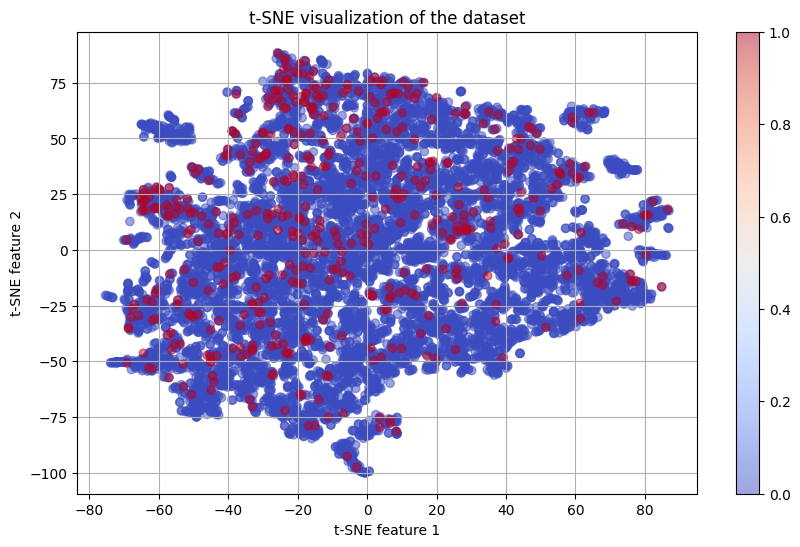

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Dropping non-feature columns for scaling
features = df_imputed.drop(['year', 'class'], axis=1)

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30, learning_rate=200)
tsne_results = tsne.fit_transform(features_scaled)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df_imputed['class'], cmap='coolwarm', alpha=0.5)
plt.colorbar()
plt.title('t-SNE visualization of the dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.grid(True)
plt.show()


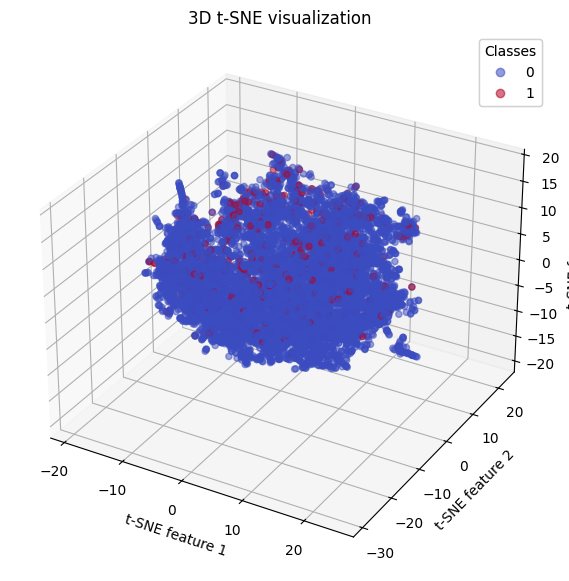

In [23]:
tsne_3d = TSNE(n_components=3, random_state=0, perplexity=30, learning_rate=200)
tsne_results_3d = tsne_3d.fit_transform(features_scaled)

# Creating a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_results_3d[:, 0], tsne_results_3d[:, 1], tsne_results_3d[:, 2], c=df_imputed['class'], cmap='coolwarm', alpha=0.5)
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)
ax.set_title('3D t-SNE visualization')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')
plt.show()

In [29]:
%pip install umap_learn

  Obtaining dependency information for umap_learn from https://files.pythonhosted.org/packages/d1/1b/46802a050b1c55d10c4f59fc6afd2b45ac9b4f62b2e12092d3f599286f14/umap_learn-0.5.6-py3-none-any.whl.metadata
  Obtaining dependency information for numba>=0.51.2 from https://files.pythonhosted.org/packages/38/f0/ad848815b0adafcf5f238e728933950034355a8d59969772be1cd57606d8/numba-0.59.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pynndescent>=0.5 from https://files.pythonhosted.org/packages/bf/06/18c0e17eb245b7caeb861f2ff747adb0575500183b6ec4282d5350d29e9f/pynndescent-0.5.12-py3-none-any.whl.metadata
  Obtaining dependency information for llvmlite<0.43,>=0.42.0dev0 from https://files.pythonhosted.org/packages/f3/bd/3b27a1c8bbbe01b053f5e0c9ca9a37dbc3e39282dfcf596d143ad389f156/llvmlite-0.42.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   -------------- ------------------------- 30.7/85.7 kB 660.6 kB/s et


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:

import umap.umap_ as umap

c:\Users\dathr\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


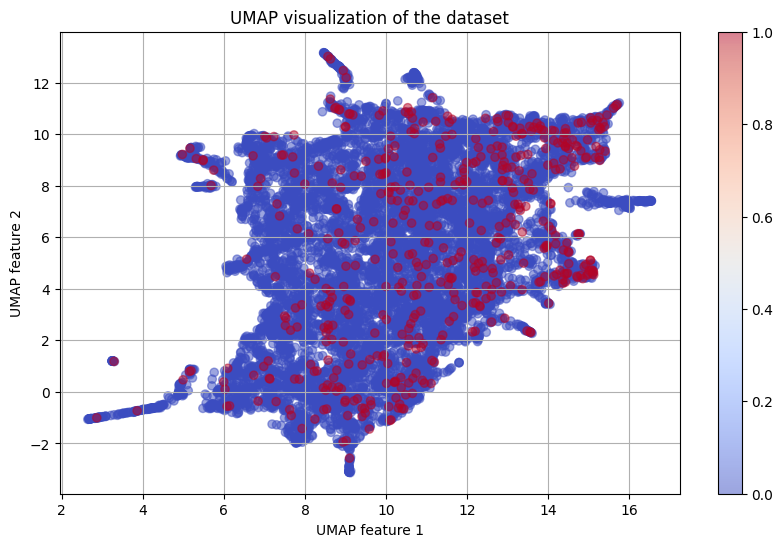

In [31]:
# Applying UMAP
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='euclidean')
umap_results = reducer.fit_transform(features_scaled)

# Plotting the UMAP results
plt.figure(figsize=(10, 6))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=df_imputed['class'], cmap='coolwarm', alpha=0.5)
plt.colorbar()
plt.title('UMAP visualization of the dataset')
plt.xlabel('UMAP feature 1')
plt.ylabel('UMAP feature 2')
plt.grid(True)
plt.show()

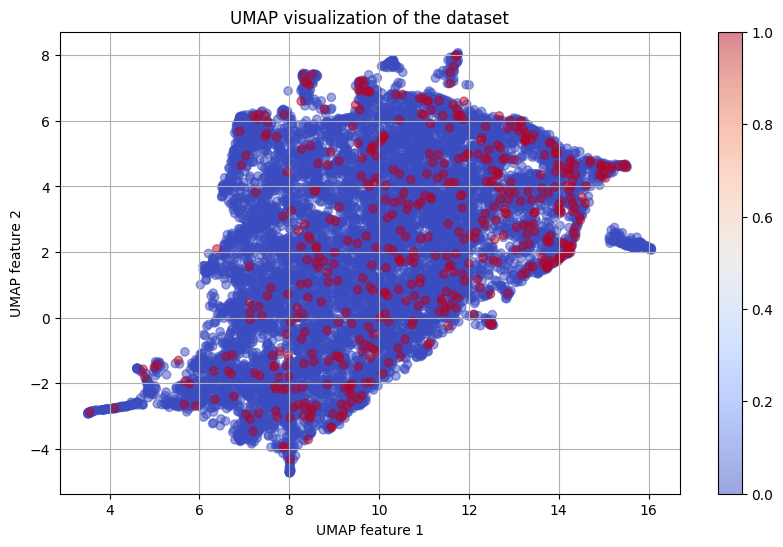

In [33]:
# Applying UMAP with n_neighbors
reducer = umap.UMAP(n_neighbors=50, n_components=2, metric='euclidean')
umap_results = reducer.fit_transform(features_scaled)

# Plotting the UMAP results
plt.figure(figsize=(10, 6))
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=df_imputed['class'], cmap='coolwarm', alpha=0.5)
plt.colorbar()
plt.title('UMAP visualization of the dataset')
plt.xlabel('UMAP feature 1')
plt.ylabel('UMAP feature 2')
plt.grid(True)
plt.show()